In [3]:
import numpy as np
import matplotlib.pyplot as plt
import fdscheme as fds
from tabulate import tabulate

## Problem 1 & 2

The analytic solution is computed as such:

$\dot{y}=3y-2t$

$e^{-3t}[\dot{y}-3y]=-2te^{-3t}$

$\frac{d}{dt}[e^{-3t}y(t)]=-2te^{-3t}$

From here is is east to integrate using integration by parts on the right-hand side to obtain the general solution:

$y(t)=\frac{2}{9}[3t+1]+Ce^{3t}$

plugging the initial condition y(0)=1 to solve for C we find the exact solution:

$y(t)=\frac{2}{9}[3t+1]+\frac{7}{9}e^{3t}$

In [4]:
def y_dot(t, y):
    return 3*y-2*t

def y(t, y0):
    c = y0 - 2/9
    return 2/9*(3*t+1) + c*np.e**(3*t)

runge-kutta, euler, and heun (improved euler) data with exact solution and relative error for h=0.1 

  t    euler     heun      rk4    exact    eul err    heun err       rk err
---  -------  -------  -------  -------  ---------  ----------  -----------
0    1        1        1        1        0          0           0
0.1  1.3      1.335    1.3385   1.33878  0.028966   0.00282278  0.000208453
0.2  1.67     1.76258  1.77201  1.77276  0.0579656  0.00574476  0.00042494
0.3  2.131    2.31466  2.33372  2.33525  0.0874626  0.00881427  0.000653081
0.4  2.7103   3.03422  3.06846  3.0712   0.117512   0.0120408   0.000893636
0.5  3.44339  3.97903  4.03668  4.04131  0.147953   0.015412    0.00114574


runge-kutta, euler, and heun (improved euler) data with exact solution and relative error for h=0.05 

   t    euler     heun       rk    exact     eul err     heun err       rk err
----  -------  -------  -------  -------  ----------  -----------  -----------
0     1        1        1        1     

<function matplotlib.pyplot.show(close=None, block=None)>

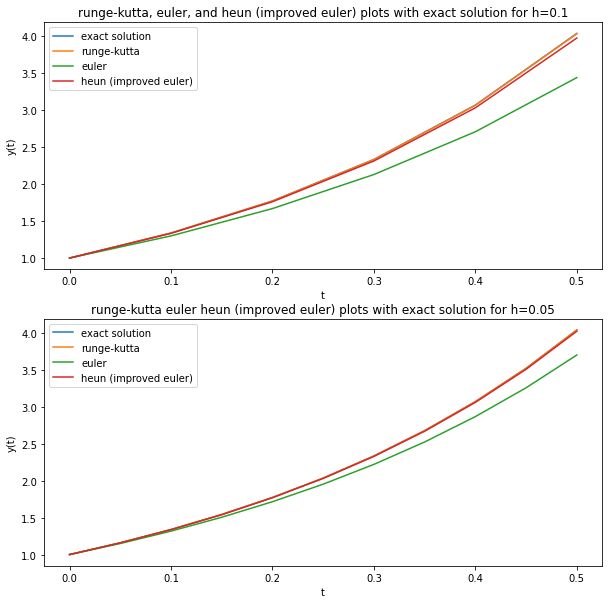

In [6]:
t_min = 0
t_max = 0.5
h = 0.1
y0 = np.array([1])

t = fds.Grid(t_min, t_max, h).create_grid()
sol = fds.Scheme(y_dot, y0, t_min, t_max, h)
exact= sol.exact_solution(y)
runge, name = sol.runge_kutta()
euler, name1 = sol.euler()
heun, name2 = sol.heun()

error1 = fds.Error(exact, runge, 1).relative_error()
error2 = fds.Error(exact, euler, 1).relative_error()
error3 = fds.Error(exact, heun, 1).relative_error()
rows = np.zeros((t.size,8))
first_row = ['t', name1, 'heun', 'rk4', 'exact', 'eul err', 'heun err', 'rk err']
table = [first_row]

for i in range(0,t.size):
    rows[i,0] = t[i]
    rows[i,1] = euler[0, i]
    rows[i,2] = heun[0, i]
    rows[i,3] = runge[0, i]
    rows[i,4] = exact[0, i]
    rows[i,5] = error2[0, i]
    rows[i,6] = error3[0, i]
    rows[i,7] = error1[0, i]
    table.append(rows[i,:].tolist())

# plotting
title = name + ', ' + name1 + ', and ' + name2 + ' data with exact solution and relative error for h=' + str(h)
title = title.center(20)
print(title, '\n')
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancygrid'))
print('\n')

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(t,exact[0,:], label="exact solution")
plt.plot(t,runge[0,:], label=name)
plt.plot(t,euler[0,:], label=name1)
plt.plot(t,heun[0,:], label=name2)
#plt.errorbar(t, approx[0,:], yerr = error[0,:], fmt = '-o')
plt.title(name + ', ' + name1 + ', and ' + name2 + ' plots with exact solution for h=' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

h = 0.05
t = fds.Grid(t_min, t_max, h).create_grid()
sol = fds.Scheme(y_dot, y0, t_min, t_max, h)
exact= sol.exact_solution(y)
runge, name = sol.runge_kutta()
euler, name1 = sol.euler()
heun, name2 = sol.heun()
error1 = fds.Error(exact, runge, 1).relative_error()
error2 = fds.Error(exact, euler, 1).relative_error()
error3 = fds.Error(exact, heun, 1).relative_error()

rows = np.zeros((t.size,8))
first_row = ['t', name1, 'heun', 'rk', 'exact', 'eul err', 'heun err', 'rk err']
table = [first_row]

for i in range(0,t.size):
    rows[i,0] = t[i]
    rows[i,1] = euler[0, i]
    rows[i,2] = heun[0, i]
    rows[i,3] = runge[0, i]
    rows[i,4] = exact[0, i]
    rows[i,5] = error2[0, i]
    rows[i,6] = error3[0, i]
    rows[i,7] = error1[0, i]
    table.append(rows[i,:].tolist())

# plotting
title = name + ', ' + name1 + ', and ' + name2 + ' data with exact solution and relative error for h=' + str(h)
title = title.center(20)
print(title, '\n')
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancygrid'))
print('\n')

plt.subplot(2,1,2)
plt.plot(t,exact[0,:], label="exact solution")
plt.plot(t,runge[0,:], label=name)
plt.plot(t,euler[0,:], label=name1)
plt.plot(t,heun[0,:], label=name2)
#plt.errorbar(t, approx[0,:], yerr = error[0,:], fmt = '-o')
plt.title(name + ' ' + name1 + ' ' + name2 + ' plots with exact solution for h=' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()
plt.show

AB/AM predictor and adams moulton 4 data with exact solution and relative error for h=0.1 

  t    AB/AM predictor    adams moulton 4    exact      am4 err     abam err
---  -----------------  -----------------  -------  -----------  -----------
0              1                  1        1        0            0
0.1            1.3385             1.3385   1.33878  0.000208453  0.000208453
0.2            1.77201            1.77201  1.77276  0.00042494   0.00042494
0.3            2.33424            2.33372  2.33525  0.000429205  0.000653081
0.4            3.06989            3.0691   3.0712   0.000427413  0.000685893
0.5            4.03959            4.03846  4.04131  0.00042599   0.00070735


AB/AM predictor and adams moulton 4 data with exact solution and relative error for h=0.05 

   t    AB/AM predictor    adams moulton 4    exact      am4 err     abam err
----  -----------------  -----------------  -------  -----------  -----------
0               1                  1        1        

<function matplotlib.pyplot.show(close=None, block=None)>

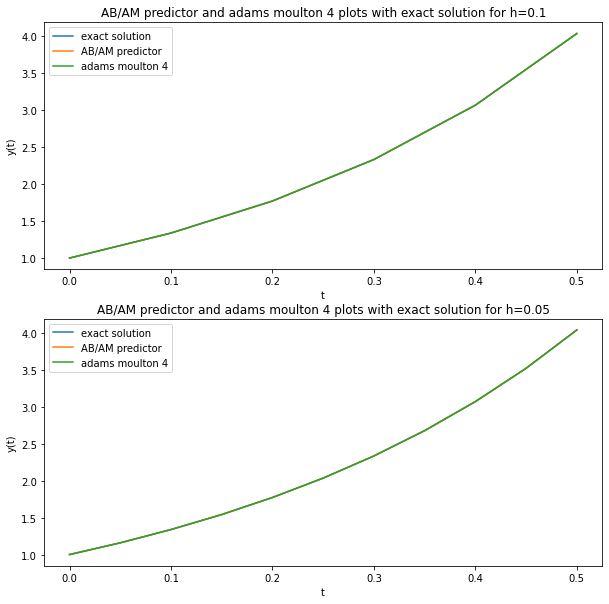

In [7]:
t_min = 0
t_max = 0.5
h = 0.1
y0 = np.array([1])

t = fds.Grid(t_min, t_max, h).create_grid()
sol = fds.Scheme(y_dot, y0, t_min, t_max, h)
exact= sol.exact_solution(y)
abam, name = sol.abam()
am4, name1 = sol.adams_moulton4()

error1 = fds.Error(exact, am4, 1).relative_error()
error2 = fds.Error(exact, abam, 1).relative_error()
rows = np.zeros((t.size,6))
first_row = ['t', name, name1, 'exact', 'am4 err', 'abam err']
table = [first_row]

for i in range(0,t.size):
    rows[i,0] = t[i]
    rows[i,1] = am4[0, i]
    rows[i,2] = abam[0, i]
    rows[i,3] = exact[0, i]
    rows[i,4] = error1[0, i]
    rows[i,5] = error2[0, i]
    table.append(rows[i,:].tolist())

# plotting
title = name + ' and ' + name1 + ' data with exact solution and relative error for h=' + str(h)
title = title.center(20)
print(title, '\n')
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancygrid'))
print('\n')

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(t,exact[0,:], label="exact solution")
plt.plot(t,am4[0,:], label=name)
plt.plot(t,abam[0,:], label=name1)
#plt.errorbar(t, approx[0,:], yerr = error[0,:], fmt = '-o')
plt.title(name + ' and ' + name1 + ' plots with exact solution for h=' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

h = 0.05

t = fds.Grid(t_min, t_max, h).create_grid()
sol = fds.Scheme(y_dot, y0, t_min, t_max, h)
exact= sol.exact_solution(y)
abam, name = sol.abam()
am4, name1 = sol.adams_moulton4()

error1 = fds.Error(exact, am4, 1).relative_error()
error2 = fds.Error(exact, abam, 1).relative_error()
rows = np.zeros((t.size,6))
first_row = ['t', name, name1, 'exact', 'am4 err', 'abam err']
table = [first_row]

for i in range(0,t.size):
    rows[i,0] = t[i]
    rows[i,1] = am4[0, i]
    rows[i,2] = abam[0, i]
    rows[i,3] = exact[0, i]
    rows[i,4] = error1[0, i]
    rows[i,5] = error2[0, i]
    table.append(rows[i,:].tolist())

# plotting
title = name + ' and ' + name1 + ' data with exact solution and relative error for h=' + str(h)
title = title.center(20)
print(title, '\n')
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancygrid'))
print('\n')

plt.subplot(2,1,2)
plt.plot(t,exact[0,:], label="exact solution")
plt.plot(t,am4[0,:], label=name)
plt.plot(t,abam[0,:], label=name1)
#plt.errorbar(t, approx[0,:], yerr = error[0,:], fmt = '-o')
plt.title(name + ' and ' + name1 + ' plots with exact solution for h=' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()
plt.show

## Discussion

2b.) The fourth order Adams-Mouton scheme and AB/AM Predictor scheme were seeded with the Runge-Kutta scheme.
In terns of accuracy, the Adams-Moulton scheme is the best. The AM scheme appears to be on the same order as Runge-Kutta
if h=0.1. However its accuracy is shown to be superior when h=0.05 as it's error consistently stays within $10^{-5}$
while Runge-Kutta slips into $10^{-4}$. The AB/AM Predictor scheme also consistently keeps its error within $10^{-5}$.
However, AB/AM is slighly less accurate that Adams-Moulton. In terms of computational speed however, Runge-Kutta is
faster than either of these methods because it is a one-step scheme where as Adams-Moulton and AB/AM are multi-step
schemes.

2c.) An example of an explicit scheme is Runge-Kutta. An explicit scheme is one where $y_{n+1}$ is defined only by steps
which have come before it. An implicit scheme is one where $y_{n+1}$ is defined in terms of $y_{n+1}$. Implicit schemes,
unlike explict schemes, rely on an initial guess from an explicit scheme which the implicit scheme then corrects.
A multi-stage/multi-step method is one that uses many previous approximations of $y_n$ in order to obtain $y_{n+1}$ (e.g.
$y_{n-1}, y_{n-2}$, etc.). As previously mentioned, the Adams-Moulton scheme is an example of a multi-step scheme where
as Runge-Kutta is a one-step scheme.

## Problem 3

In [9]:
def ODE_sys(t, X):
    x = r*float(X[1])
    y = -r*float(X[0])
    sys = np.array([x,y])
    return sys
    
def ODE_exact(t, y0):
    x = np.cos(r*t)
    y = -np.sin(r*t)
    X = np.array([[x,y]])
    return X

runge-kutta data with exact solution and relative error for h=0.05 and r=1 

    t         x          y     x apx      y apx     x err       y err
-----  --------  ---------  --------  ---------  --------  ----------
 0      1        -0          1         0         0         nan
 0.05   0.999    -0.05       0.999    -0.05      2.61e-07    5.21e-08
 0.1    0.995    -0.0998     0.995    -0.0998    5.22e-07    3.13e-07
 0.15   0.989    -0.149      0.989    -0.149     7.85e-07    5.74e-07
 0.2    0.98     -0.199      0.98     -0.199     1.05e-06    8.35e-07
 0.25   0.969    -0.247      0.969    -0.247     1.31e-06    1.1e-06
 0.3    0.955    -0.296      0.955    -0.296     1.58e-06    1.36e-06
 0.35   0.939    -0.343      0.939    -0.343     1.85e-06    1.62e-06
 0.4    0.921    -0.389      0.921    -0.389     2.12e-06    1.88e-06
 0.45   0.9      -0.435      0.9      -0.435     2.39e-06    2.15e-06
 0.5    0.878    -0.479      0.878    -0.479     2.66e-06    2.41e-06
 0.55   0.853    -0.5

/home/nate/fdscheme.py:255: RuntimeWarning: invalid value encountered in true_divide
  error[:, i] = np.abs((self.exact[:, i] - self.approx[:, i])/self.exact[:, i])


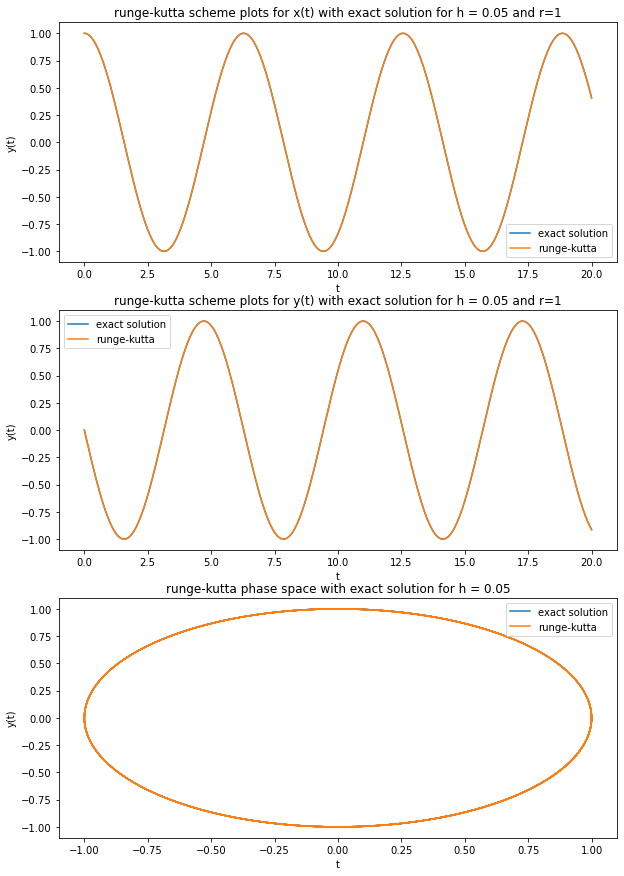

In [36]:
t_min = 0
t_max = 20
h = 0.05
r = 1
X0 = np.array([1,0])
#ODE_exact(0,X0)
#print(ODE_exact(0,X0))

t = fds.Grid(t_min, t_max, h).create_grid()
sol = fds.Scheme(ODE_sys, X0, t_min, t_max, h)
exact = sol.exact_solution(ODE_exact)
approx, name = sol.runge_kutta()
error = fds.Error(exact, approx, 2).relative_error()
rows = np.zeros((t.size,7))
first_row = ['t', 'x', 'y', 'x apx', 'y apx', 'x err', 'y err']
table = [first_row]

for i in range(0,t.size):
    rows[i,0] = t[i]
    rows[i,1] = np.format_float_scientific(exact[0, i], unique=False, precision=2)
    rows[i,2] = np.format_float_scientific(exact[1, i], unique=False, precision=2)
    rows[i,3] = np.format_float_scientific(approx[0, i], unique=False, precision=2)
    rows[i,4] = np.format_float_scientific(approx[1, i], unique=False, precision=2)
    rows[i,5] = np.format_float_scientific(error[0, i], unique=False, precision=2)
    rows[i,6] = np.format_float_scientific(error[1, i], unique=False, precision=2)
    table.append(rows[i,:].tolist())

# plotting
title = name + ' data with exact solution and relative error for h=' + str(h) + ' and r=' +str(r)
title = title.center(20)
print(title, '\n')
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancygrid'))
print('\n')

plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(t,exact[0, :], label="exact solution")
plt.plot(t,approx[0, :], label=name)
#plt.errorbar(t, approx[0,:], yerr = error[0,:], fmt = '-o')
plt.title(name + ' scheme plots for x(t) with exact solution for h = ' + str(h) + ' and r=' + str(r))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,2)
plt.plot(t,exact[1, :], label="exact solution")
plt.plot(t,approx[1, :], label=name)
#plt.errorbar(t, approx[0,:], yerr = error[0,:], fmt = '-o')
plt.title(name + ' scheme plots for y(t) with exact solution for h = ' + str(h) + ' and r=' + str(r))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,3)
plt.plot(exact[0, :],exact[1, :], label="exact solution")
plt.plot(approx[0, :],approx[1, :], label=name)
#plt.errorbar(t, approx[0,:], yerr = error[0,:], fmt = '-o')
plt.title(name + ' phase space with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

runge-kutta data with exact solution and relative error for h=0.05 and r=1.5 

    t         x          y     x apx      y apx     x err       y err
-----  --------  ---------  --------  ---------  --------  ----------
 0      1        -0          1         0         0         nan
 0.05   0.997    -0.0749     0.997    -0.0749    1.32e-06    2.64e-07
 0.1    0.989    -0.149      0.989    -0.149     2.66e-06    1.59e-06
 0.15   0.975    -0.223      0.975    -0.223     4e-06       2.91e-06
 0.2    0.955    -0.296      0.955    -0.296     5.36e-06    4.24e-06
 0.25   0.931    -0.366      0.931    -0.366     6.74e-06    5.58e-06
 0.3    0.9      -0.435      0.9      -0.435     8.12e-06    6.91e-06
 0.35   0.865    -0.501      0.865    -0.501     9.53e-06    8.26e-06
 0.4    0.825    -0.565      0.825    -0.565     1.1e-05     9.6e-06
 0.45   0.781    -0.625      0.781    -0.625     1.24e-05    1.1e-05
 0.5    0.732    -0.682      0.732    -0.682     1.39e-05    1.23e-05
 0.55   0.679    -0.

/home/nate/fdscheme.py:255: RuntimeWarning: invalid value encountered in true_divide
  error[:, i] = np.abs((self.exact[:, i] - self.approx[:, i])/self.exact[:, i])


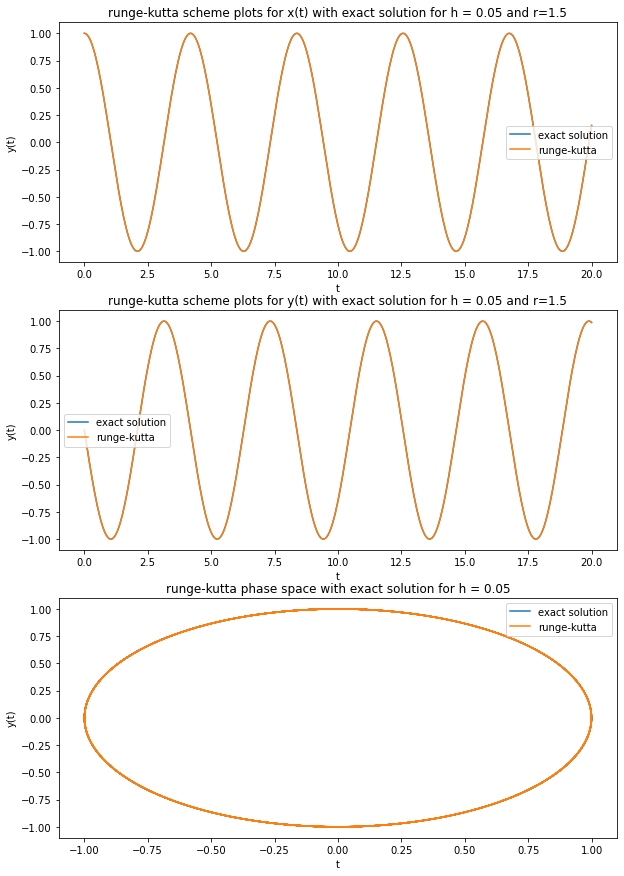

In [35]:
t_min = 0
t_max = 20
h = 0.05
r = 1.5
X0 = np.array([1,0])
#ODE_exact(0,X0)
#print(ODE_exact(0,X0))

t = fds.Grid(t_min, t_max, h).create_grid()
sol = fds.Scheme(ODE_sys, X0, t_min, t_max, h)
exact = sol.exact_solution(ODE_exact)
approx, name = sol.runge_kutta()
error = fds.Error(exact, approx, 2).relative_error()
rows = np.zeros((t.size,7))
first_row = ['t', 'x', 'y', 'x apx', 'y apx', 'x err', 'y err']
table = [first_row]

for i in range(0,t.size):
    rows[i,0] = t[i]
    rows[i,1] = np.format_float_scientific(exact[0, i], unique=False, precision=2)
    rows[i,2] = np.format_float_scientific(exact[1, i], unique=False, precision=2)
    rows[i,3] = np.format_float_scientific(approx[0, i], unique=False, precision=2)
    rows[i,4] = np.format_float_scientific(approx[1, i], unique=False, precision=2)
    rows[i,5] = np.format_float_scientific(error[0, i], unique=False, precision=2)
    rows[i,6] = np.format_float_scientific(error[1, i], unique=False, precision=2)
    table.append(rows[i,:].tolist())

# plotting
title = name + ' data with exact solution and relative error for h=' + str(h) + ' and r=' +str(r)
title = title.center(20)
print(title, '\n')
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancygrid'))
print('\n')

plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(t,exact[0, :], label="exact solution")
plt.plot(t,approx[0, :], label=name)
#plt.errorbar(t, approx[0,:], yerr = error[0,:], fmt = '-o')
plt.title(name + ' scheme plots for x(t) with exact solution for h = ' + str(h) + ' and r=' +str(r))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,2)
plt.plot(t,exact[1, :], label="exact solution")
plt.plot(t,approx[1, :], label=name)
#plt.errorbar(t, approx[0,:], yerr = error[0,:], fmt = '-o')
plt.title(name + ' scheme plots for y(t) with exact solution for h = ' + str(h) + ' and r=' +str(r))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,3)
plt.plot(exact[0, :],exact[1, :], label="exact solution")
plt.plot(approx[0, :],approx[1, :], label=name)
#plt.errorbar(t, approx[0,:], yerr = error[0,:], fmt = '-o')
plt.title(name + ' phase space with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

3c.) I chose to use the Runge-Kutta scheme as the data is relatively large for an assignment and Runge-Kutta provides
reasonable accuracy with low computational cost. The scheme performs well here and we can see where r=1 that it has very
low error both in the table and the plot. In terms of the error for r=1 however, we can see that the error increases by
four magnitudes beginning with an error of $10^{-8}$ and ending at $10^{-4}$. Increasing r corresponds to increasing the frequency of the wave, something that can be easily seen in the analytic solution. For r=1.5 the scheme is less accurate but
the drop-off in accuracy is not as stark, decreasing by only three magnitudes from start to finish. This may indicate
some instability in the scheme over long time scales and for bigger values of r or longer-time calculations, it may be
better to sacrifice computational cost for greater accuracy

3d.) The data and plots for the analytic solution are included in every data set for this assignment. The exact solution is calculated by:

$\begin{bmatrix}
    \dot{x} \\
    \dot{y}
 \end{bmatrix} = 
 \begin{bmatrix}
     ry \\
     -rx
 \end{bmatrix}$
 
We put this in matrix form:
 
$X = \begin{bmatrix}
        0 & r \\
        -r & 0
     \end{bmatrix}$
     
Calculate the determinant of

$\begin{vmatrix}
    X-\lambda I
 \end{vmatrix} = 
 \begin{vmatrix}
     -\lambda & r \\
     -r & -\lambda
 \end{vmatrix}$
 
We are left with a polynomial equation which we use to find eigenvalues. It is easy to see that the eigenvalues are purely imaginary indicating that the dynamical behavior of this system is a center as we can see in the plotted phase space.

$\lambda = \pm ir$

The eigenvectors are relatively easy to calculate and are:

$v_{1,2} = \begin{bmatrix}
               1 \\
               i
           \end {bmatrix},
           \begin{bmatrix}
               1 \\
               -i
           \end{bmatrix}$
           
Leaving us with the general solution:

$\begin{bmatrix}
    x \\
    y
 \end{bmatrix} = c_1e^{-rt}
 \begin{bmatrix}
      1\\
      i
 \end{bmatrix} + c_2e^{rt}
 \begin{bmatrix}
      1\\
      -i
 \end{bmatrix}$
 
 doing some simple algebraic and trigonometric manipulation we find:
 
 $\begin{bmatrix}
    x \\
    y
 \end{bmatrix} = c_1
 \begin{bmatrix}
      cos(rt)\\
      -sin(rt)
 \end{bmatrix} + c_2
 \begin{bmatrix}
      sin(rt)\\
      cos(rt)
 \end{bmatrix}$
 
 Using the initial conditions x(0)=1 and y(0)=0, it is easy to determine that
 
 $c_1=1, c_2=0$
 
 Leaving us with the exact solution
 $\begin{bmatrix}
    x \\
    y
 \end{bmatrix} = 
 \begin{bmatrix}
     cos(rx) \\
     -sin(rx)
 \end{bmatrix}$
 
 Which agrees with our plots